In [1]:
#Import relevant packages for analyses 
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import xarray as xr   
import momlevel as ml #import momlevel for SST calc
import cftime
import cmocean 
from cartopy import crs as ccrs, feature as cfeature 
import cartopy.crs as ccrs

#Define figures to be of certain size
%matplotlib inline                                     
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 

In [2]:
### NorEMSL Atmosphere data

### Pre EOT
nor_atm_PREEOT = xr.open_dataset('TS_35ma0418.nc')
nor_atm_cg_PREEOT = xr.open_dataset('TS_35ma0418_um_bil.nc')

### Post EOT
nor_atm_POSTEOT = xr.open_dataset('TS_35ma2co2.nc')
nor_atm_cg_POSTEOT = xr.open_dataset('TS_35ma2co2_um_bil.nc')

### NorEMSL SST data

### Pre EOT
nor_sst_cg_PREEOT = xr.open_dataset('sst_35ma0418_um_bil.nc') 

### Post EOT
nor_sst_cg_POSTEOT = xr.open_dataset('sst_35ma2co2_um_bil.nc')


## NorEMSL Raw Data Analysis

### SAT data

In [3]:
nor_atm_PREEOT

<xarray.Dataset>
Dimensions:  (lat: 48, lon: 96, lev: 26, ilev: 27)
Coordinates:
  * ilev     (ilev) float64 2.194 4.895 9.882 18.05 ... 903.3 956.0 985.1 1e+03
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lev      (lev) float64 3.545 7.389 13.97 23.94 ... 867.2 929.6 970.6 992.6
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Data variables:
    P0       float64 ...
    PS       (lat, lon) float32 ...
    T        (lev, lat, lon) float32 ...
    TREFHT   (lat, lon) float32 ...
    TS       (lat, lon) float32 ...
    hyai     (ilev) float64 ...
    hyam     (lev) float64 ...
    hybi     (ilev) float64 ...
    hybm     (lev) float64 ...
Attributes: (12/15)
    Conventions:                CF-1.0
    source:                     CAM
    case:                       35ma0418
    title:                      UNSET
    logname:                    zhang
    host:                       hexagon-5
    ...                         ...
    topography_file:            /work/zhang/ccsminput/atm/cam/topo/topo_ccsm4...
    history:                    Mon Jun  7 06:33:08 2021: ncks -v T,TREFHT,TS...
    NCO:                        netCDF Operators version 4.7.9 (Homepage = ht...
    nco_openmp_thread_number:   1
    yrs_averaged:               2001-2199
    history_of_appended_files:  Thu Mar  1 14:39:38 2018: Appended file month...

In [4]:
### Plot PreEOT SAT data
#nor_atm_PREEOT.T.plot()

In [5]:
### Plot PostEOT SAT data
#nor_atm_POSTEOT.T.plot()

In [6]:
#Find difference between POST- and Pre- EOT SAT
#nor_diff_atm_POST_PRE  = nor_atm_POSTEOT - nor_atm_PREEOT

In [7]:
#Plot difference in SAT across the EOT
#nor_diff_atm_POST_PRE.T.plot()

## NorEMSL Common Grid Analysis

### SST Data

In [8]:
nor_sst_cg_POSTEOT

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 96)
Coordinates:
  * longitude  (longitude) float32 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
Data variables:
    templvl    (latitude, longitude) float64 ...
    depth      float64 ...
    time       object ...
Attributes:
    CDI:                       Climate Data Interface version 1.8.0 (http://m...
    Conventions:               CF-1.6
    history:                   Fri Mar 15 15:40:24 2019: ncwa -O -a time,dept...
    NCO:                       4.7.1
    CDO:                       Climate Data Operators version 1.8.0 (http://m...
    nco_openmp_thread_number:  1

Text(0.5, 1.0, 'NorEMSL: PRE-EOT Global SST (Common Grid)')

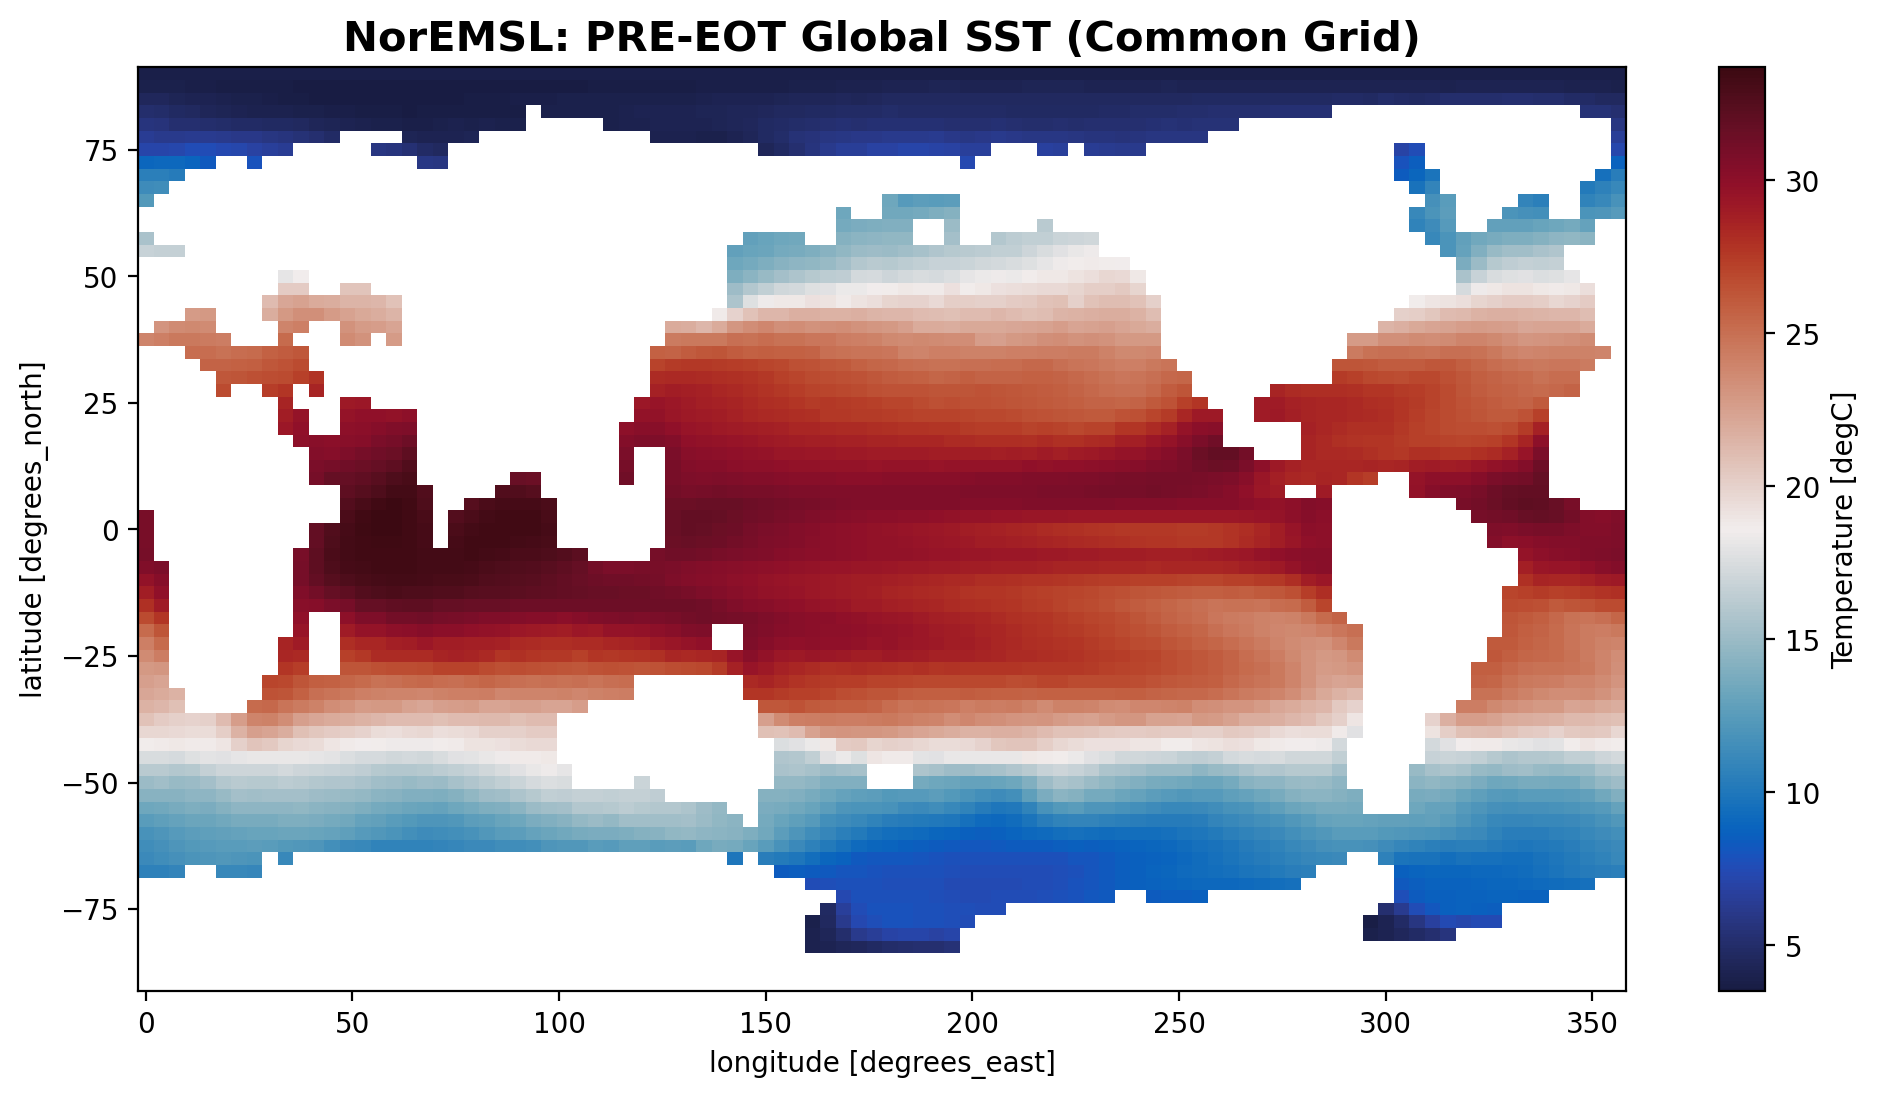

In [9]:
#Plot PREEOT SST common grid data
nor_sst_cg_PREEOT.templvl.plot(cmap=cmocean.cm.balance)
plt.title("NorEMSL: PRE-EOT Global SST (Common Grid)", fontweight="bold",  fontsize=15) #Set title 

Text(0.5, 1.0, 'NorEMSL: POST-EOT Global SST (Common Grid)')

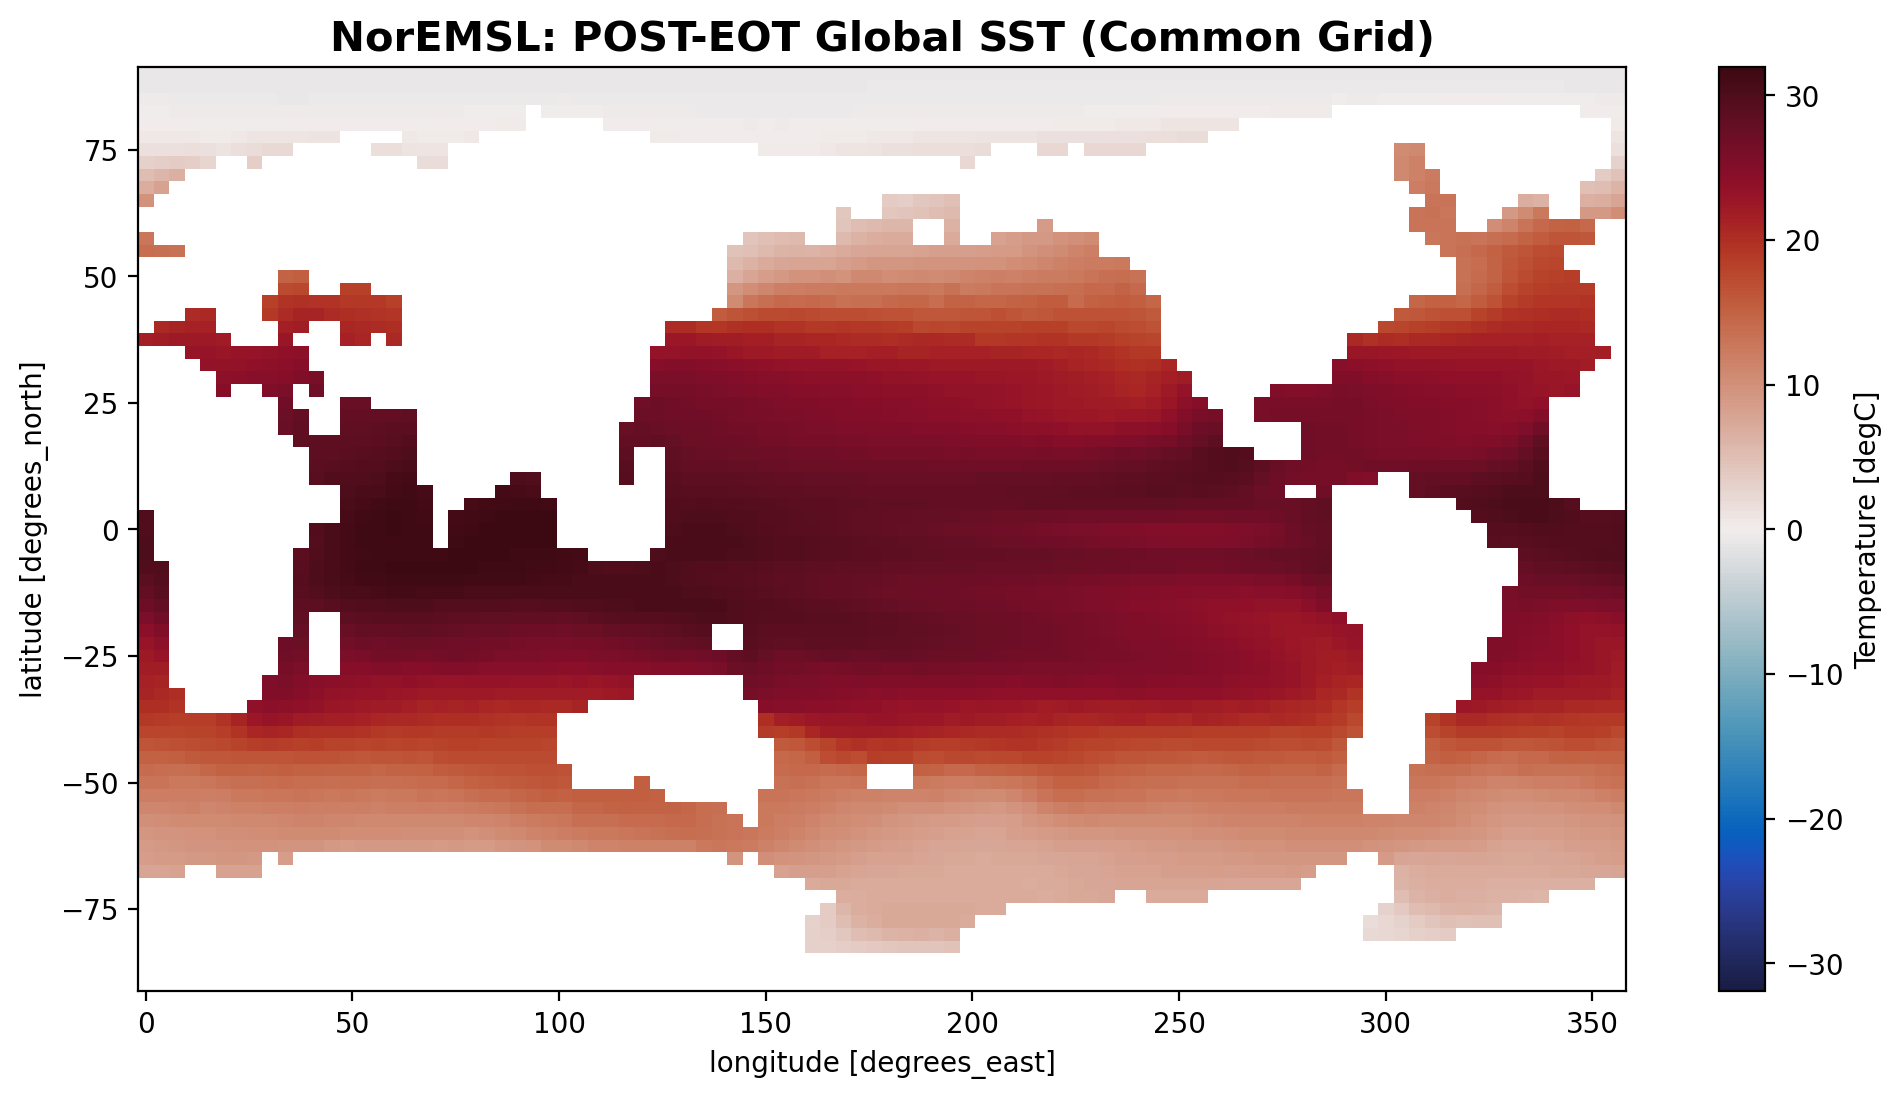

In [10]:
#Plot POSTEOT SST common grid data
nor_sst_cg_POSTEOT.templvl.plot(cmap=cmocean.cm.balance)
plt.title("NorEMSL: POST-EOT Global SST (Common Grid)", fontweight="bold",  fontsize=15) #Set title 

In [11]:
#Find SST difference of POSTEOT and PREEOT
nor_diff_sst_cg_POST_PRE = nor_sst_cg_POSTEOT - nor_sst_cg_PREEOT

Text(0.5, 1.0, 'NorEMSL: POST-EOT - PRE-EOT Global SST (Common Grid)')

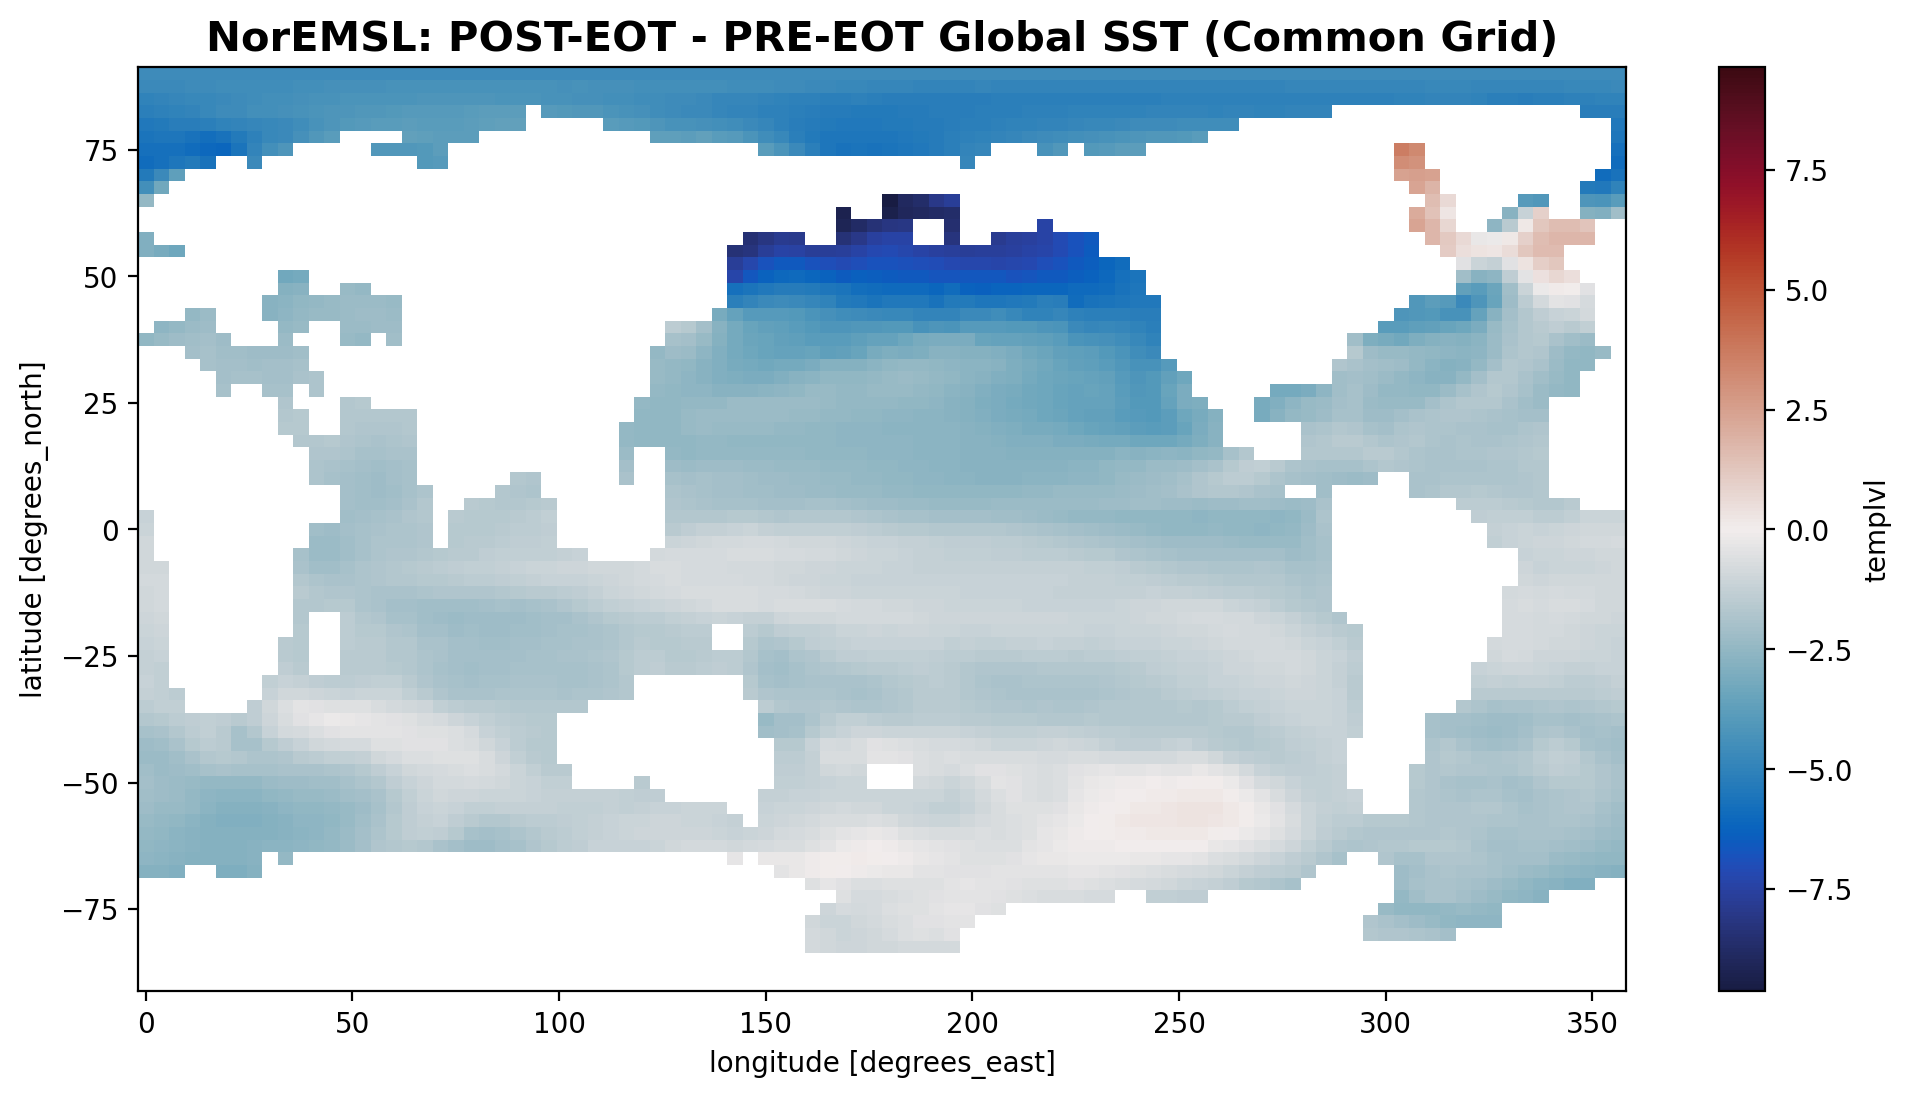

In [12]:
#Plot SST difference across EOT boundary
nor_diff_sst_cg_POST_PRE.templvl.plot(cmap=cmocean.cm.balance)
plt.title("NorEMSL: POST-EOT - PRE-EOT Global SST (Common Grid)", fontweight="bold",  fontsize=15) #Set title 

### SAT Data

In [13]:
nor_atm_cg_PREEOT

<xarray.Dataset>
Dimensions:    (longitude: 96, latitude: 73)
Coordinates:
  * longitude  (longitude) float32 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
Data variables:
    lev        float64 ...
    PS         (latitude, longitude) float32 ...
    T          (latitude, longitude) float32 ...
Attributes: (12/17)
    CDI:                        Climate Data Interface version 1.8.2 (http://...
    Conventions:                CF-1.0
    history:                    Fri Mar 15 13:29:56 2019: ncwa -O -a lev 35ma...
    source:                     CAM
    case:                       35ma0418
    title:                      UNSET
    ...                         ...
    topography_file:            /work/zhang/ccsminput/atm/cam/topo/topo_ccsm4...
    NCO:                        4.7.1
    nco_openmp_thread_number:   1
    yrs_averaged:               2001-2199
    history_of_appended_files:  Thu Mar  1 14:39:38 2018: Appended file month...
    CDO:                        Climate Data Operators version 1.8.2 (http://...

Text(0.5, 1.0, 'NorEMSL: PRE-EOT Global SAT (Common Grid)')

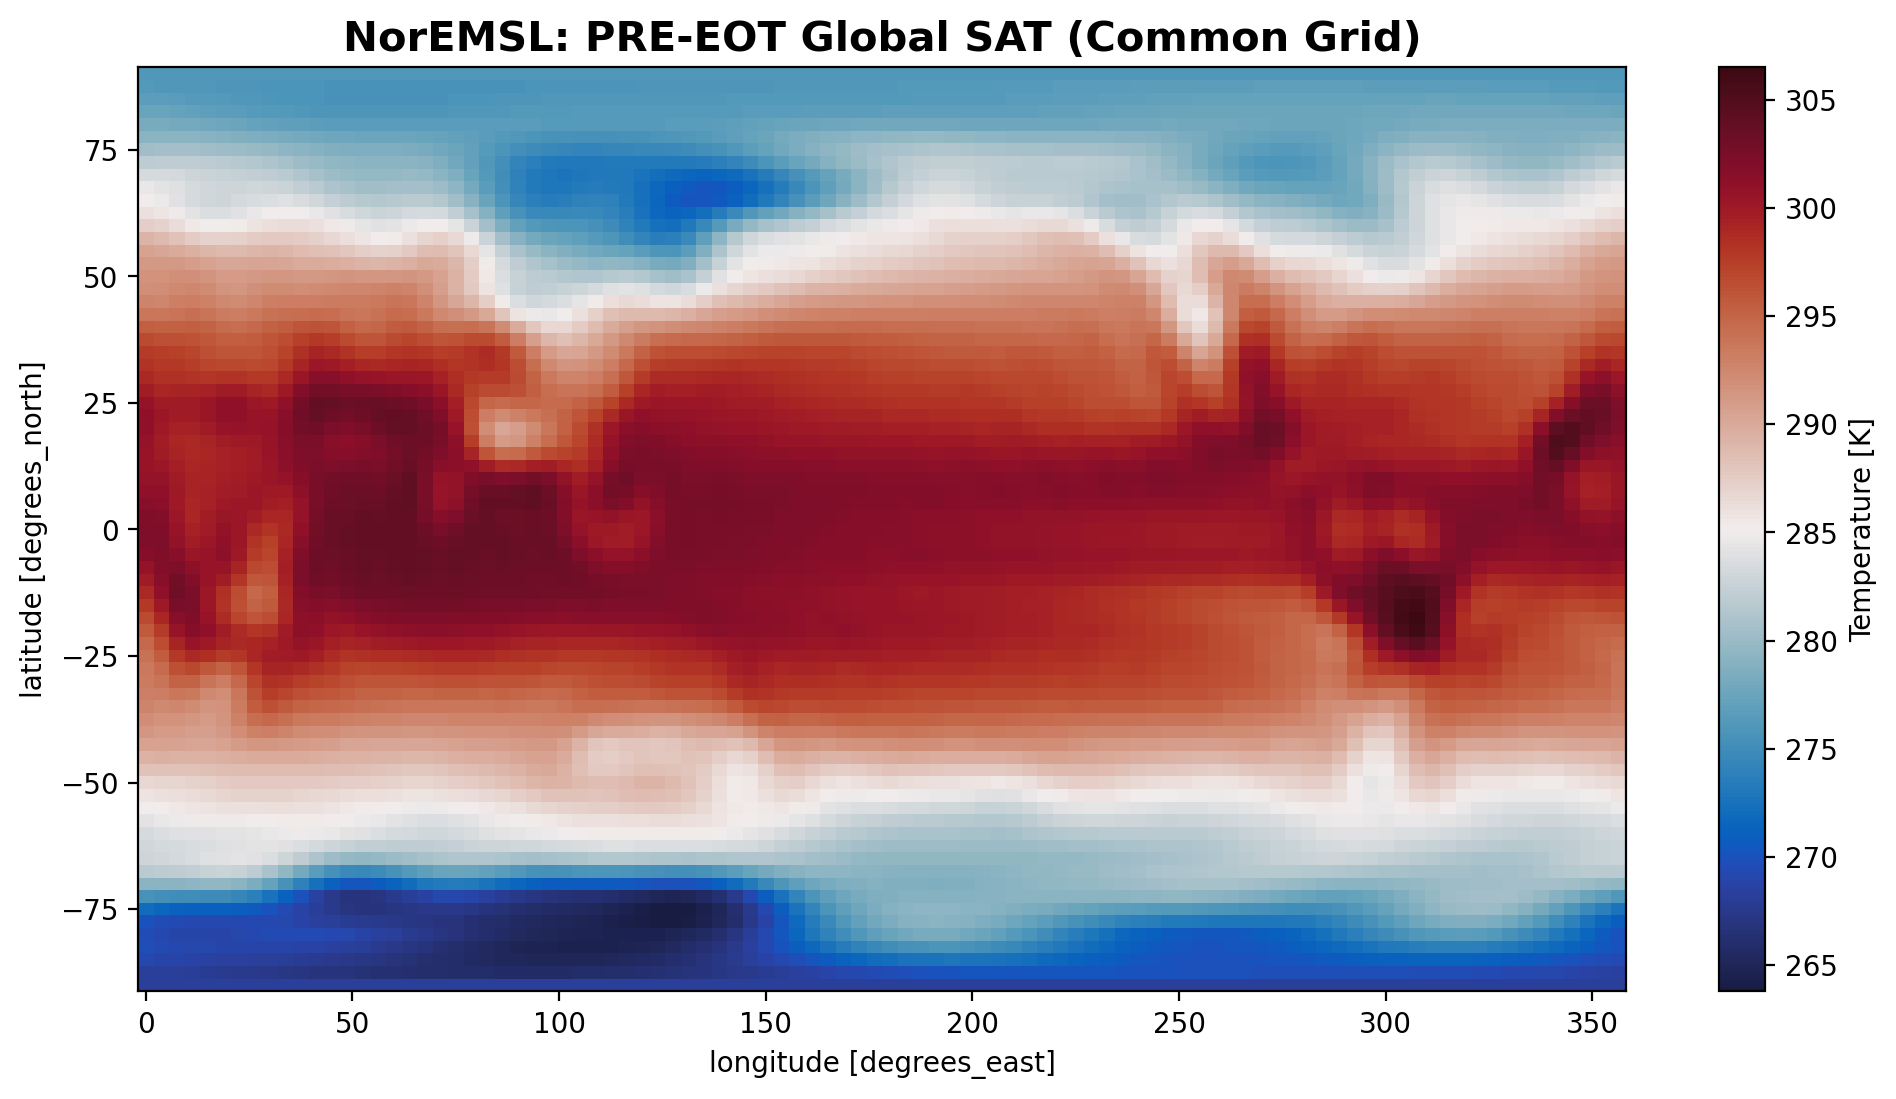

In [14]:
#Plot PREEOT common grid SAT
nor_atm_cg_PREEOT.T.plot(cmap=cmocean.cm.balance)
plt.title("NorEMSL: PRE-EOT Global SAT (Common Grid)", fontweight="bold",  fontsize=15) #Set title 

Text(0.5, 1.0, 'NorEMSL: POST-EOT Global SAT (Common Grid)')

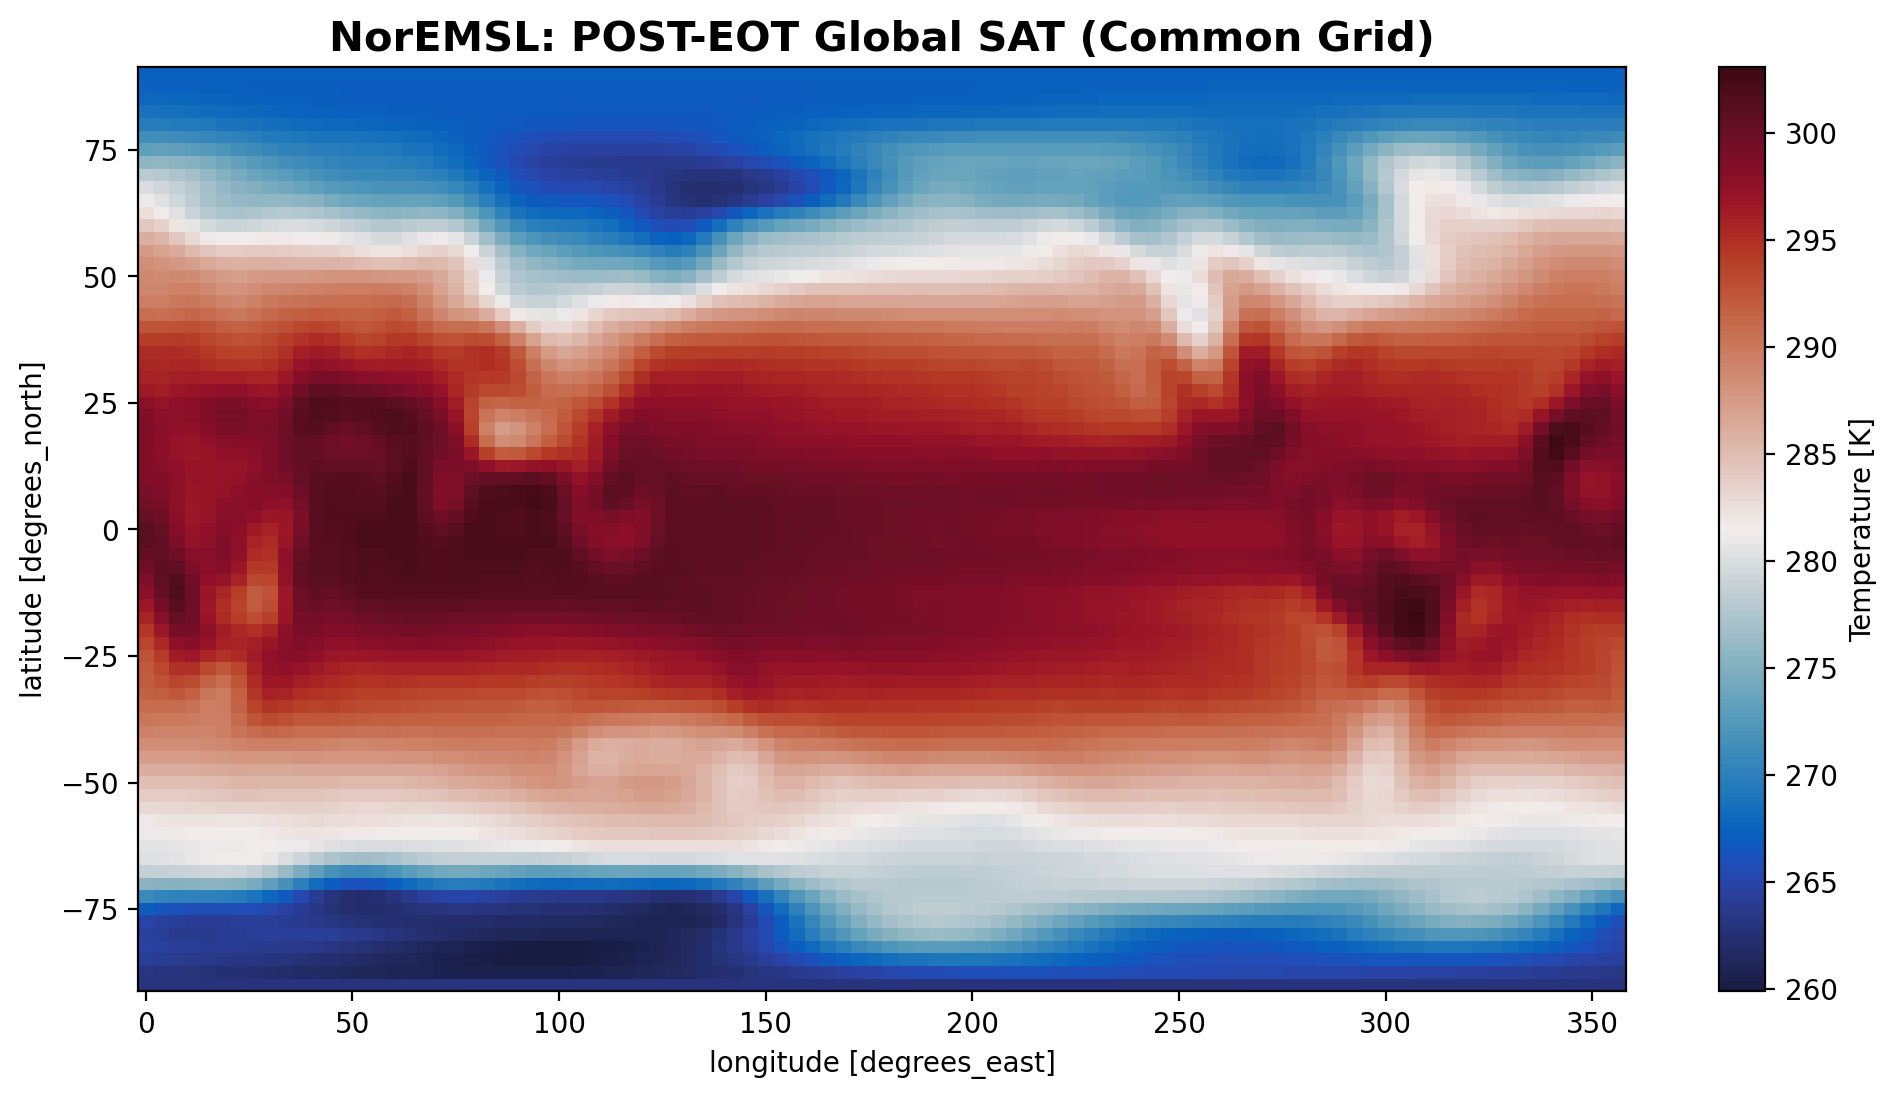

In [15]:
#Plot POSTEOT common grid SAT
nor_atm_cg_POSTEOT.T.plot(cmap=cmocean.cm.balance)
plt.title("NorEMSL: POST-EOT Global SAT (Common Grid)", fontweight="bold",  fontsize=15) #Set title 

In [16]:
#Find difference between POST- and Pre- EOT SAT
nor_diff_atm_cg_POST_PRE = nor_atm_cg_POSTEOT - nor_atm_cg_PREEOT

Text(0.5, 1.0, 'NorEMSL: POST-EOT - PRE-EOT Global SAT (Common Grid)')

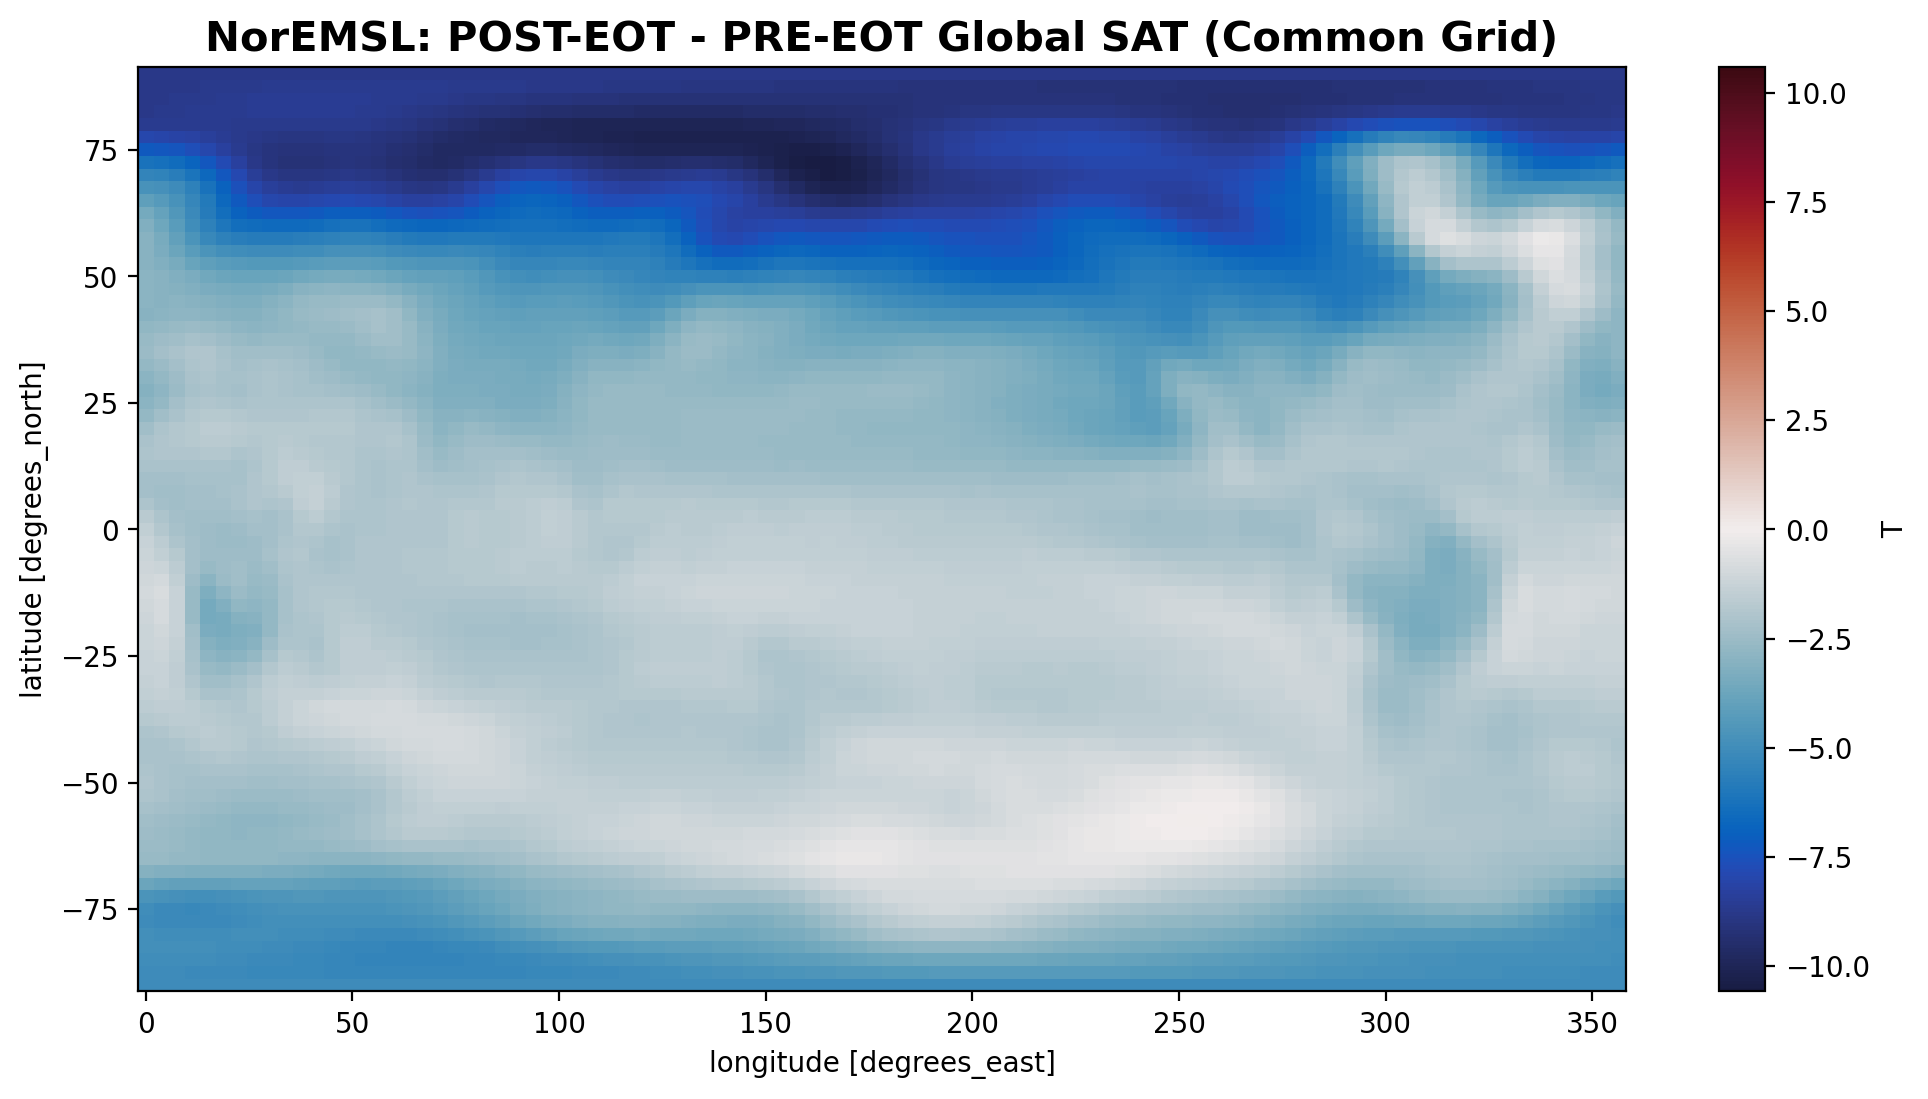

In [17]:
#Plot SAT difference across EOT on common grid
nor_diff_atm_cg_POST_PRE.T.plot(cmap=cmocean.cm.balance)
plt.title("NorEMSL: POST-EOT - PRE-EOT Global SAT (Common Grid)", fontweight="bold",  fontsize=15) #Set title 


## Projections

In [18]:
nor_diff_atm_cg_POST_PRE

<xarray.Dataset>
Dimensions:    (longitude: 96, latitude: 73)
Coordinates:
  * longitude  (longitude) float32 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
Data variables:
    lev        float64 0.0
    PS         (latitude, longitude) float32 416.4 416.4 416.4 ... -57.99 -57.99
    T          (latitude, longitude) float32 -8.791 -8.791 ... -5.118 -5.118

In [19]:
nor_diff_atm_cg_POST_PRE

<xarray.Dataset>
Dimensions:    (longitude: 96, latitude: 73)
Coordinates:
  * longitude  (longitude) float32 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
Data variables:
    lev        float64 0.0
    PS         (latitude, longitude) float32 416.4 416.4 416.4 ... -57.99 -57.99
    T          (latitude, longitude) float32 -8.791 -8.791 ... -5.118 -5.118

Text(0.5, 1.0, 'NorEMSL: Global SST Change Across EOT')

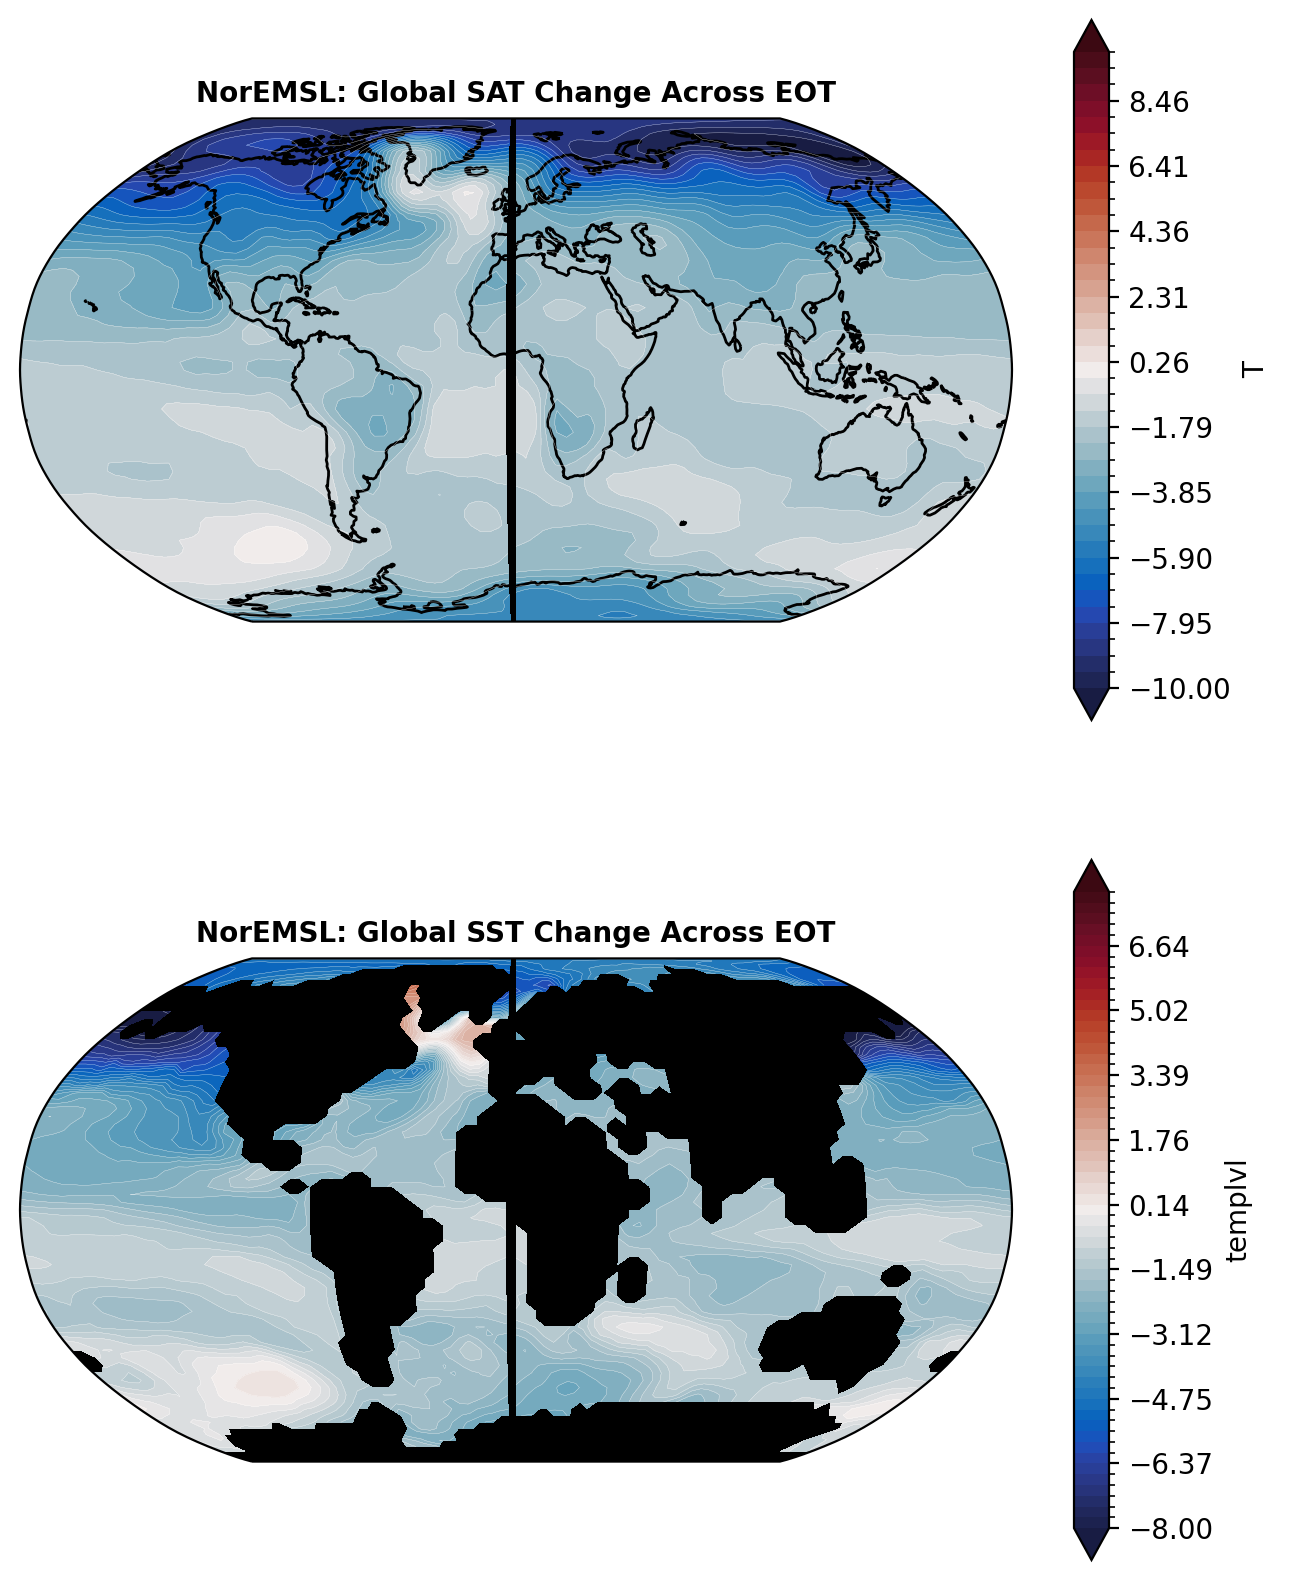

In [22]:
#Define projection type, #Set blckground to black 
subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='black') 

#Setup 2 figures of SAT and SST on Robinson projections 
fig, (ax1, ax2 ) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(8,10),
                               subplot_kw=subplot_kws)


nor_diff_atm_cg_POST_PRE.T.plot.contourf(ax=ax1,   #Plot Nor-EMSL SAT change across the EOT boundary, smooth out contours 
                              cmap=cmocean.cm.balance,
                              extend='both',vmin=-10,vmax=10,
                            transform=ccrs.PlateCarree(),levels=40,)

nor_diff_atm_cg_POST_PRE.T.plot.contour(ax=ax1,   #Add boundaries between temp changes
                              colors='white',linestyles='-',linewidths=0.1,
                              extend='both',vmin=-10,vmax=10,
                            transform=ccrs.PlateCarree(),levels=40,)

ax1.set_title("NorEMSL: Global SAT Change Across EOT", fontweight="bold",  fontsize=10) #Set title
ax1.coastlines()

nor_diff_sst_cg_POST_PRE.templvl.plot.contourf(ax=ax2,  #Plot Nor-EMSL SST change across the EOT boundary, smooth out contours 
                              cmap=cmocean.cm.balance,
                              extend='both',vmin=-8,vmax=8,
                            transform=ccrs.PlateCarree(),levels=60,)

nor_diff_sst_cg_POST_PRE.templvl.plot.contour(ax=ax2,  #Add boundaries between temp changes
                              colors='white',linestyles='-',linewidths=0.1,
                              extend='both',vmin=-8,vmax=8,
                            transform=ccrs.PlateCarree(),levels=60,)
ax2.set_title("NorEMSL: Global SST Change Across EOT", fontweight="bold",  fontsize=10) #Set title

#### **Figure 1.** Global SAT change, top, and global SST change, bottom, before and after the EOT using data generated from the NorEMSL model. Overall, there is a decreasing trend in both SAT and SST. SAT saw a decrease in temperature ranging from 1 to 10 degrees Celsius, averaging 2.5 degrees. SST saw a decrease in temperature ranging from 1 to 8 degrees, averaging around 3 degrees. SST had anomalous warming in western Antarctica and Greenland. Both SAT and SST showed a greater cooling in the northern hemisphere than in the southern hemisphere. This is likely a limitation of the model. NorEMSL data was run and compiled by Zhang et al. (2012, 2014). 